# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv("entire_dataset.csv")

In [3]:
full_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [4]:
full_df.tail()

,userId,movieId,rating,title,genres
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,31 (2016),Horror


## Basic Statistics

In [5]:
# Summary statistics
print("Summary Statistics of Ratings:")
print(full_df['rating'].describe())

# Number of unique users, movies, and genres
num_users = full_df['userId'].nunique()
num_movies = full_df['movieId'].nunique()
num_genres = full_df['genres'].nunique()
print("Number of Unique Users:", num_users)
print("Number of Unique Movies:", num_movies)
print("Number of Unique Genres:", num_genres)


Summary Statistics of Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Number of Unique Users: 610
Number of Unique Movies: 9724
Number of Unique Genres: 951


##

- Count: There are 100,836 ratings in the dataset.
- Mean: The average rating given by users is approximately 3.50.
- Standard Deviation (Std): The standard deviation of the ratings is approximately 1.04. This measures the dispersion or spread of the ratings around the mean. A lower  standard deviation indicates that the ratings tend to be closer to the mean, while a higher standard deviation indicates more variability in the ratings.
- Minimum (Min): The lowest rating given in the dataset is 0.5.
- 25th Percentile (25%): 25% of the ratings are below or equal to 3.0. This is the first quartile.
- 50th Percentile (50%) or Median: Also known as the median, it represents the middle value of the dataset when arranged in ascending order. In this case, the median rating is 3.5, indicating that half of the ratings are below 3.5 and half are above.
- 75th Percentile (75%): 75% of the ratings are below or equal to 4.0. This is the third quartile.
- Maximum (Max): The highest rating given in the dataset is 5.0.

## Distrbutions of Ratings

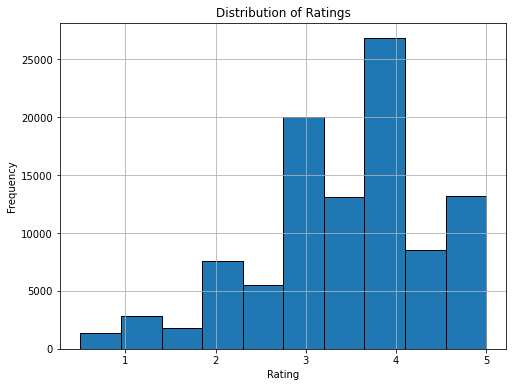

In [6]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
full_df['rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### This distribution shows that highest number of movies are rated 4, followed by 3 star and 5 star

## Top Rated Movies

Top Rated Movies:
-----------------------------------
title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64
-------------------------------------


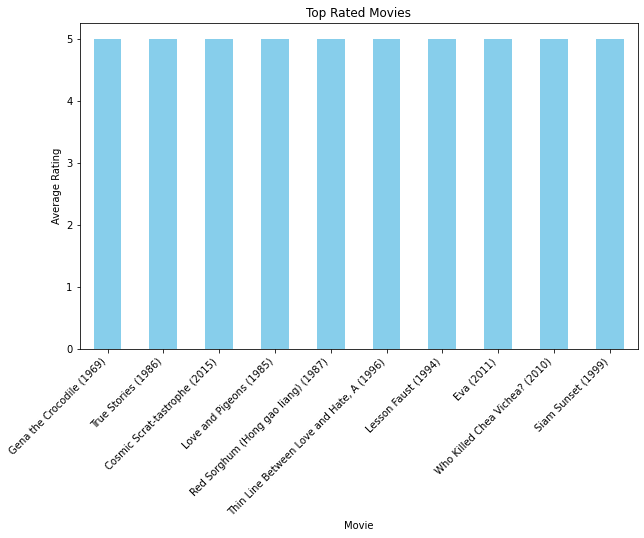

In [7]:
# Top Rated Movies
top_rated_movies = full_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("Top Rated Movies:")
print("-----------------------------------")
print(top_rated_movies)
print("-------------------------------------")
# Visualize Top Rated Movies
plt.figure(figsize=(10, 6))
top_rated_movies.plot(kind='bar', color='skyblue')
plt.title('Top Rated Movies')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


## Genres Analysis

Genre Distribution:
Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: genres, dtype: int64


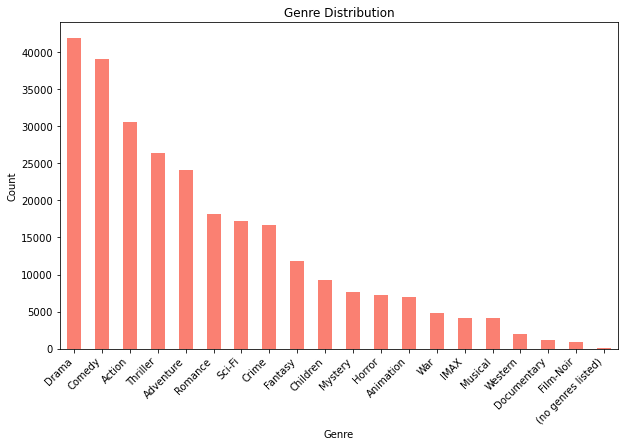

In [8]:
# Genre Analysis
genre_count = full_df['genres'].str.split('|').explode().value_counts()
print("Genre Distribution:")
print(genre_count)

# Visualize Genre Distribution
plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar', color='salmon')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## User Engagement

User Engagement (Number of Ratings per User):
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64


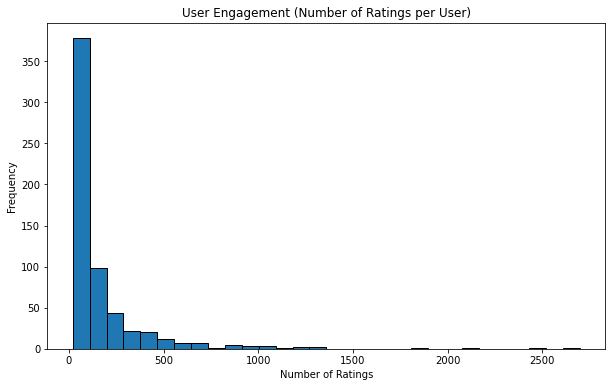

In [9]:
# User Engagement
user_engagement = full_df.groupby('userId')['rating'].count().sort_values(ascending=False)
print("User Engagement (Number of Ratings per User):")
print(user_engagement.head(10))

# Visualize User Engagement
plt.figure(figsize=(10, 6))
user_engagement.plot(kind='hist', bins=30, edgecolor='black')
plt.title('User Engagement (Number of Ratings per User)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


## Interacted vs Not Interacted

In [13]:
# Count the number of users who have rated and those who have not rated any movies

# Create the user-item matrix
user_item_matrix = full_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Count the number of users who have rated at least one movie
rated_users = (user_item_matrix > 0).sum(axis=1)

# Count the number of users who have not rated any movie
not_rated_users = (user_item_matrix.sum(axis=1) == 0)

# Print the counts
print("Number of users who have rated at least one movie:", rated_users[rated_users > 0].shape[0])
print("Number of users who have not rated any movie:", not_rated_users.sum())


Number of users who have rated at least one movie: 610
Number of users who have not rated any movie: 0
